In [1]:
from fastai.vision import *
from fastai import *

In [2]:
folder = 'quince'
file = 'quince.csv'

In [6]:
folder = 'pear'
file = 'pear.csv'

In [3]:
path = Path('data/fruits')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[PosixPath('data/fruits/pear'),
 PosixPath('data/fruits/quince'),
 PosixPath('data/fruits/models'),
 PosixPath('data/fruits/pear.csv'),
 PosixPath('data/fruits/quince.csv'),
 PosixPath('data/fruits/cleaned.csv')]

In [24]:
download_images(path/file, dest, max_pics=200)

In [5]:
classes = ['quince','pear']

In [26]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

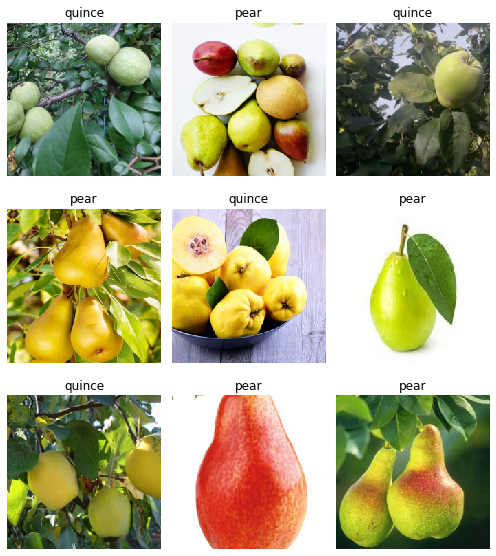

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [31]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['pear', 'quince'], 2, 304, 76)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [33]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.117665,0.738813,0.250000,00:07
1,0.674911,0.451341,0.144737,00:04
2,0.496512,0.416455,0.118421,00:04
3,0.401729,0.340501,0.105263,00:04


In [34]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [13]:
learn.load('stage-1');

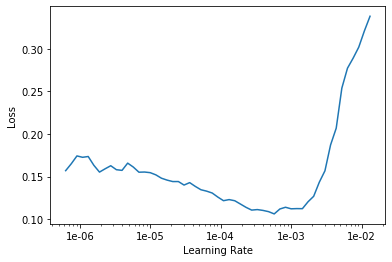

In [17]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.005259,0.301280,0.092105,00:05
1,0.028433,0.298768,0.078947,00:05


In [24]:
learn.save('stage-2')

In [9]:
learn.load('stage-2');

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

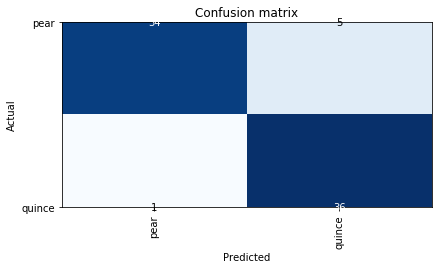

In [11]:
interp.plot_confusion_matrix()

In [12]:
from fastai.widgets import *

In [13]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [14]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [15]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [16]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [19]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [20]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.177122,0.344391,0.150000,00:04
1,0.751289,0.193109,0.050000,00:03
2,0.517865,0.135044,0.050000,00:03
3,0.435827,0.134060,0.033333,00:03


In [23]:
learn.save('stage-3')

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


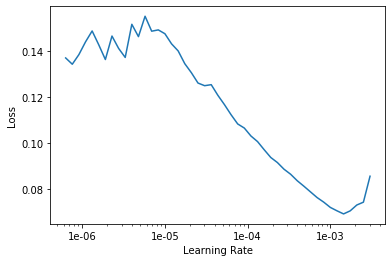

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.124222,0.241690,0.083333,00:04
1,0.144350,0.254123,0.050000,00:04


In [28]:
learn.save('stage-4')

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

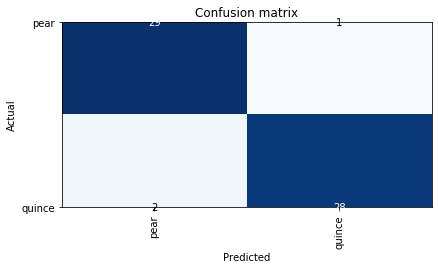

In [30]:
interp.plot_confusion_matrix()